## 2.3.8 신경망(딥러닝)
- MLP -> 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

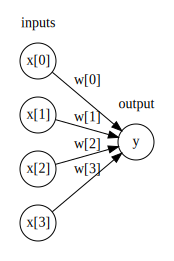

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

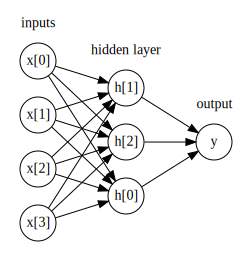

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0,0.5,'relu(x), tanh(x)')

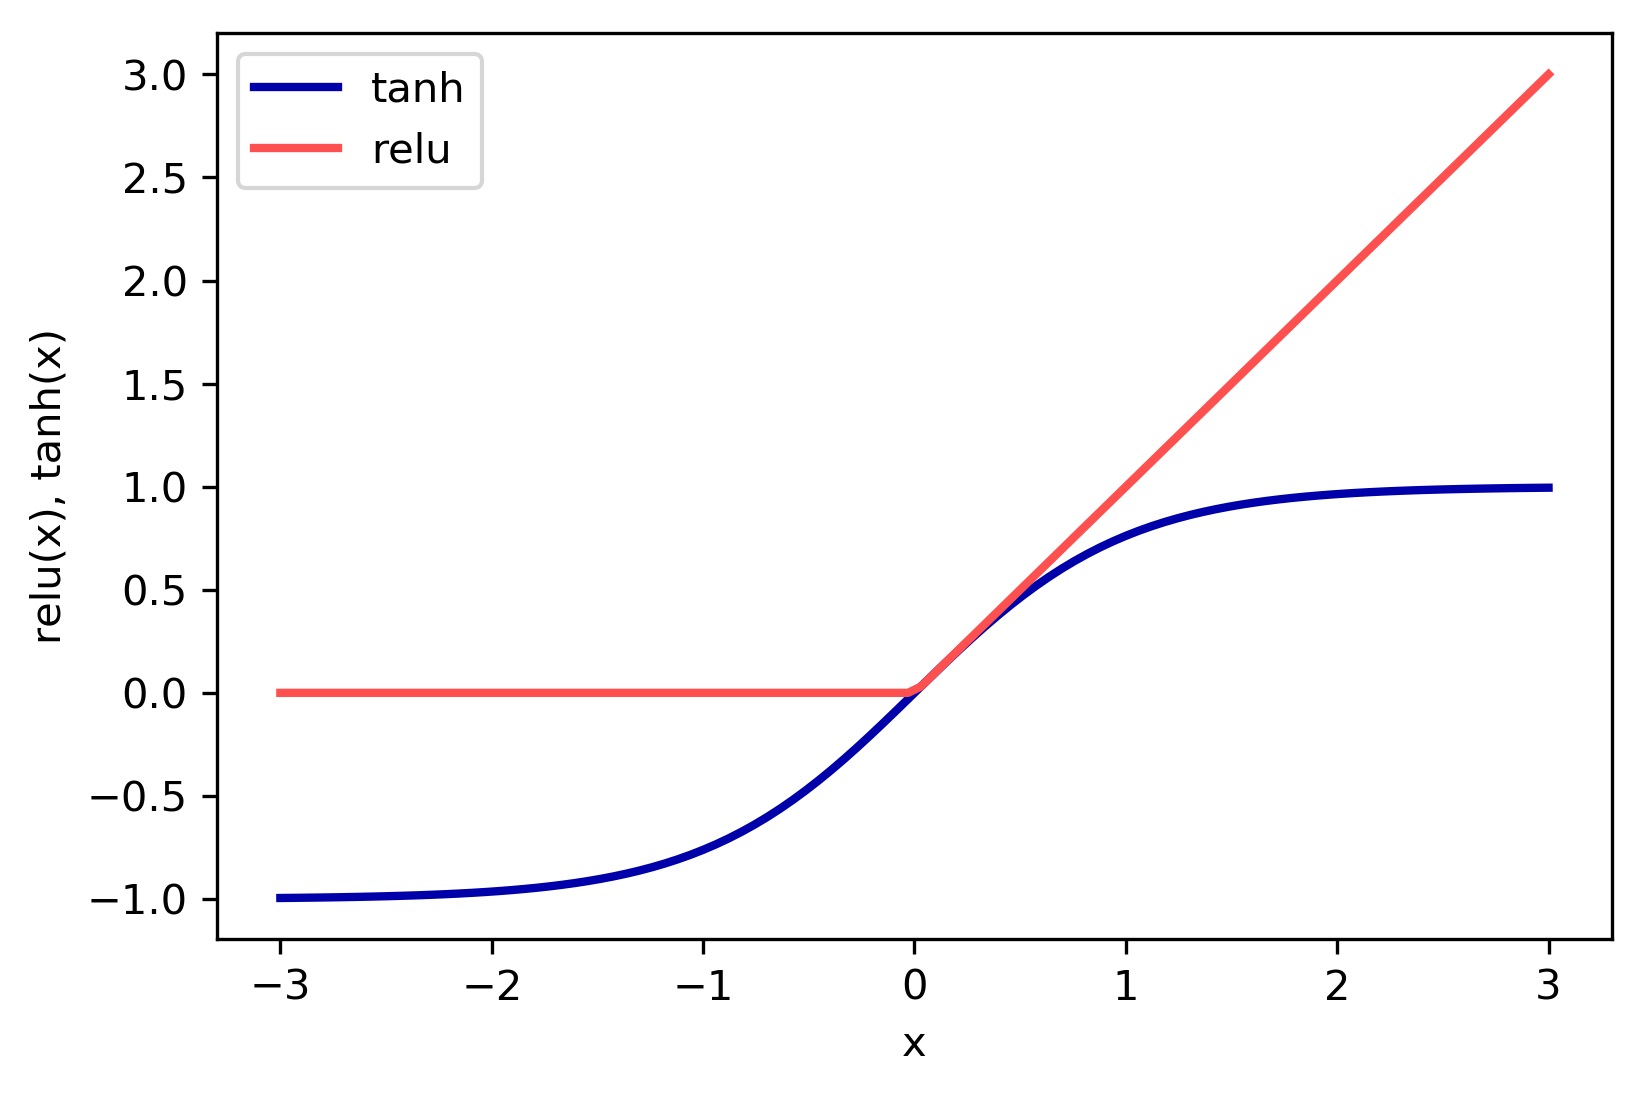

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

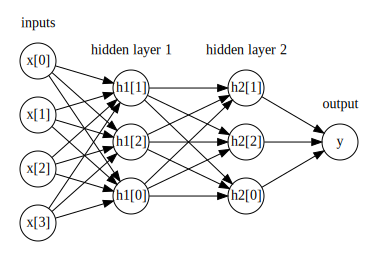

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0,0.5,'Feature 1')

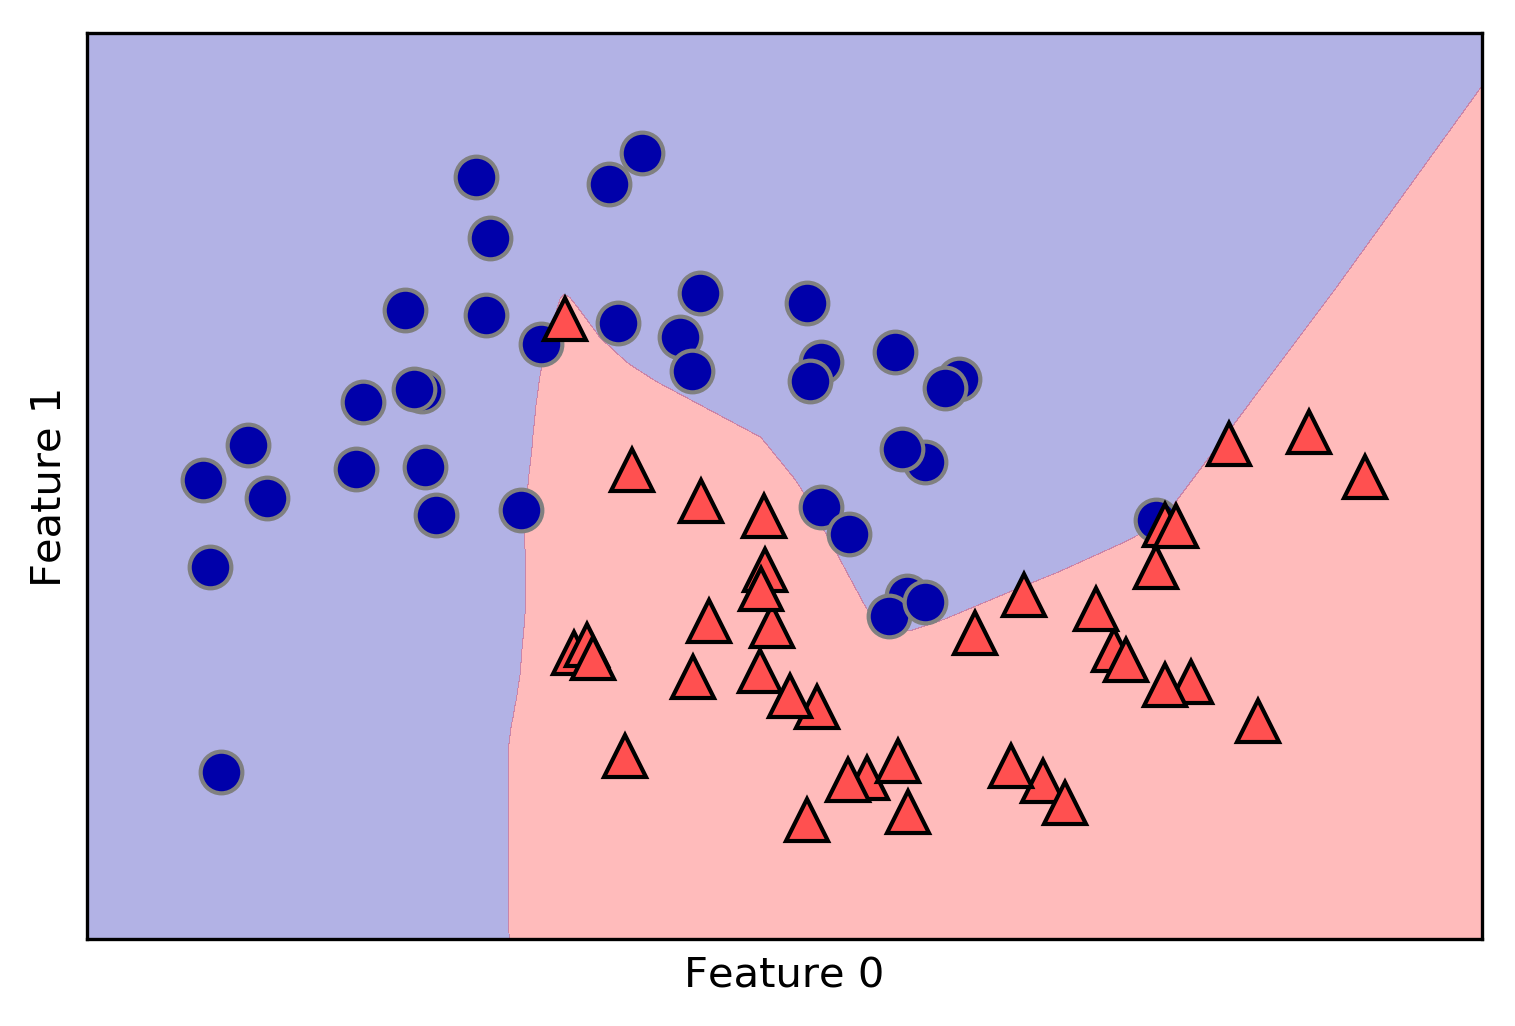

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

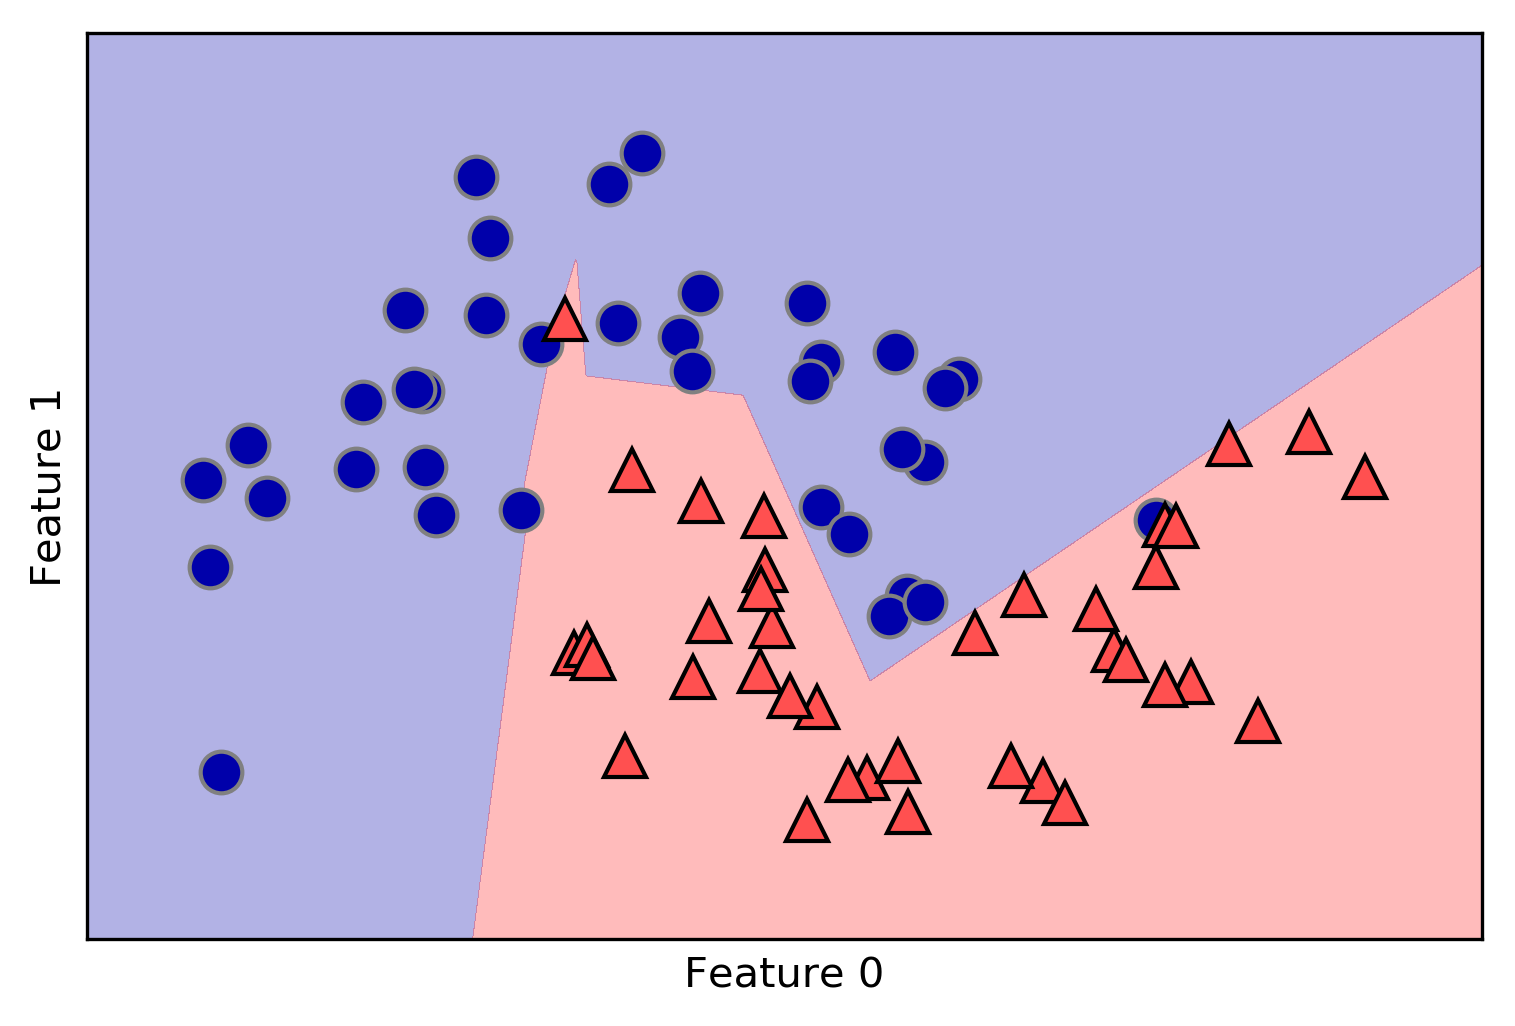

In [7]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

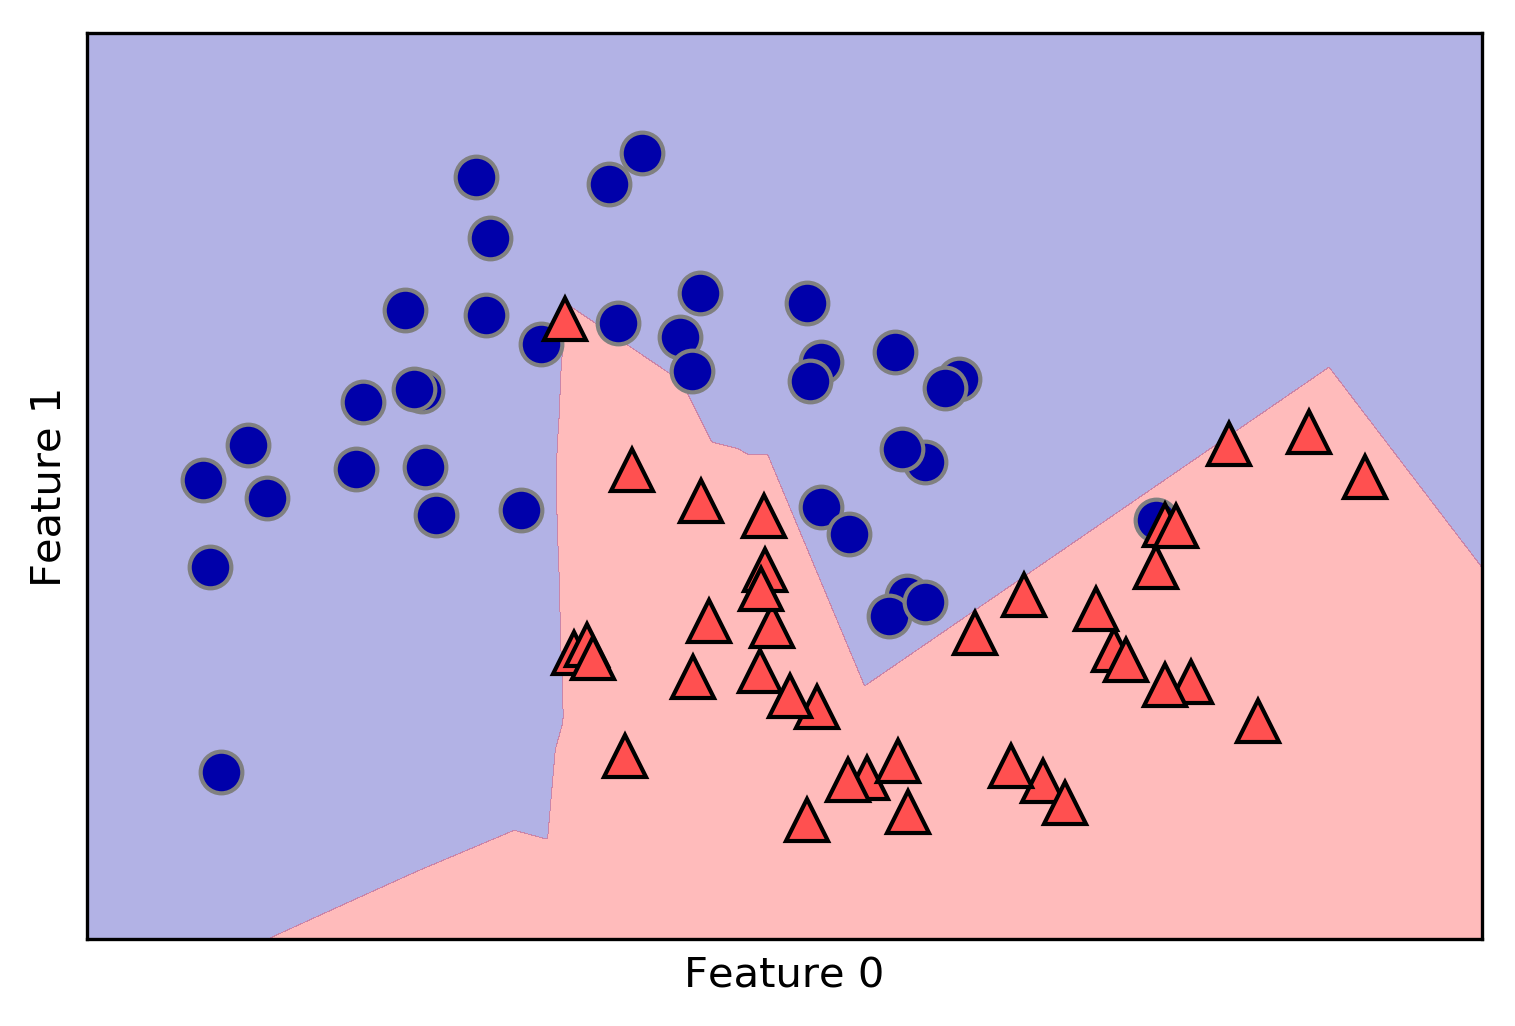

In [8]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

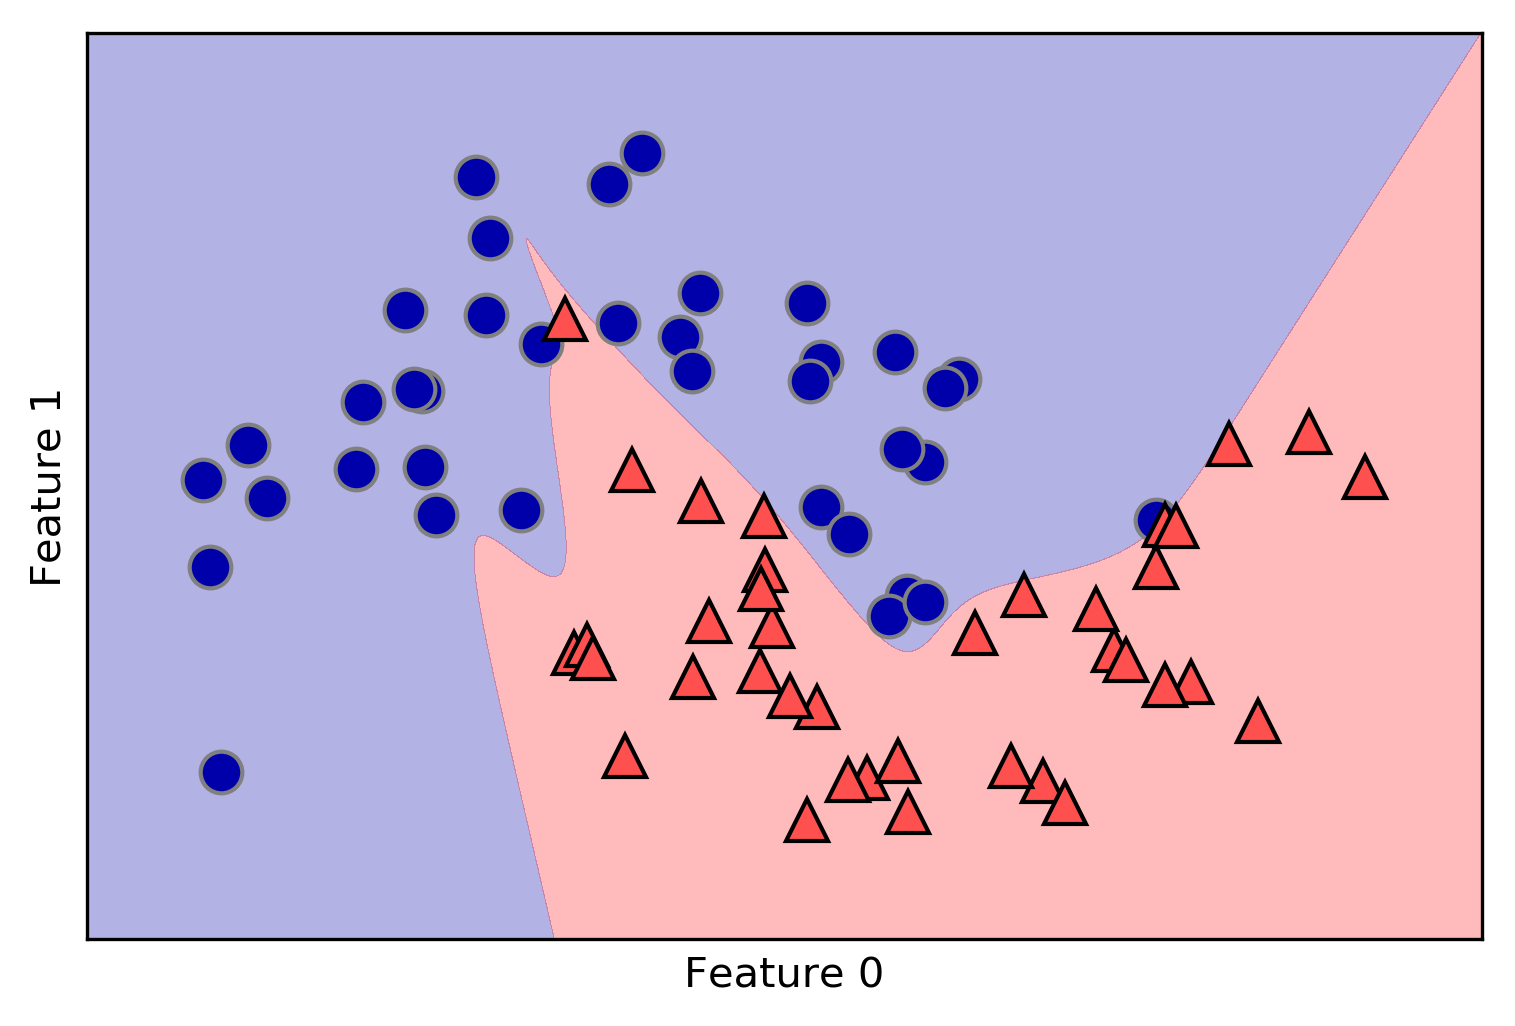

In [9]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

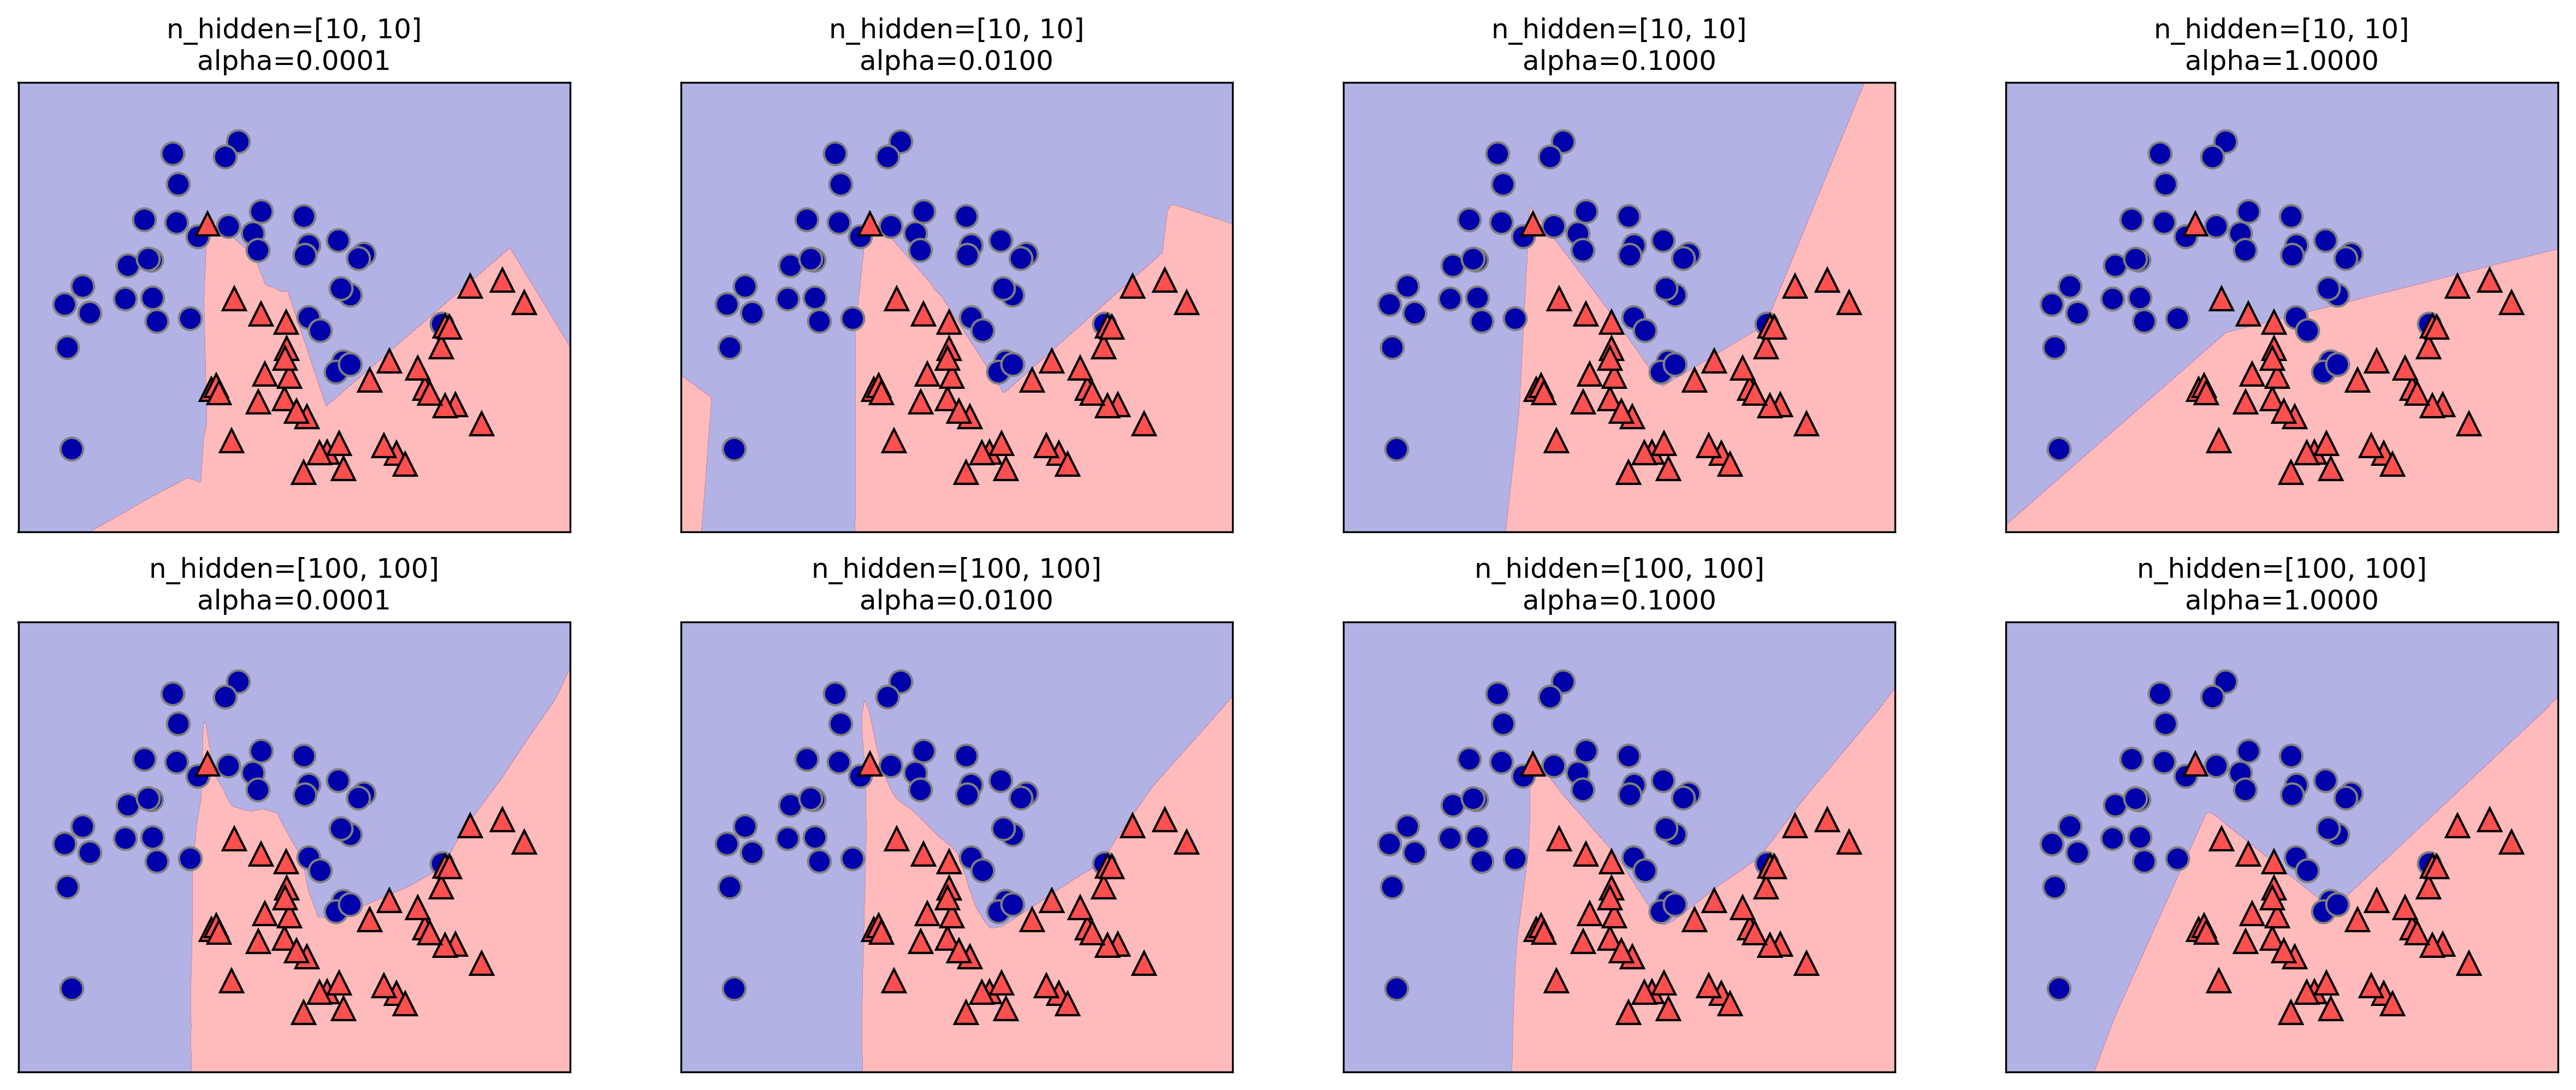

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

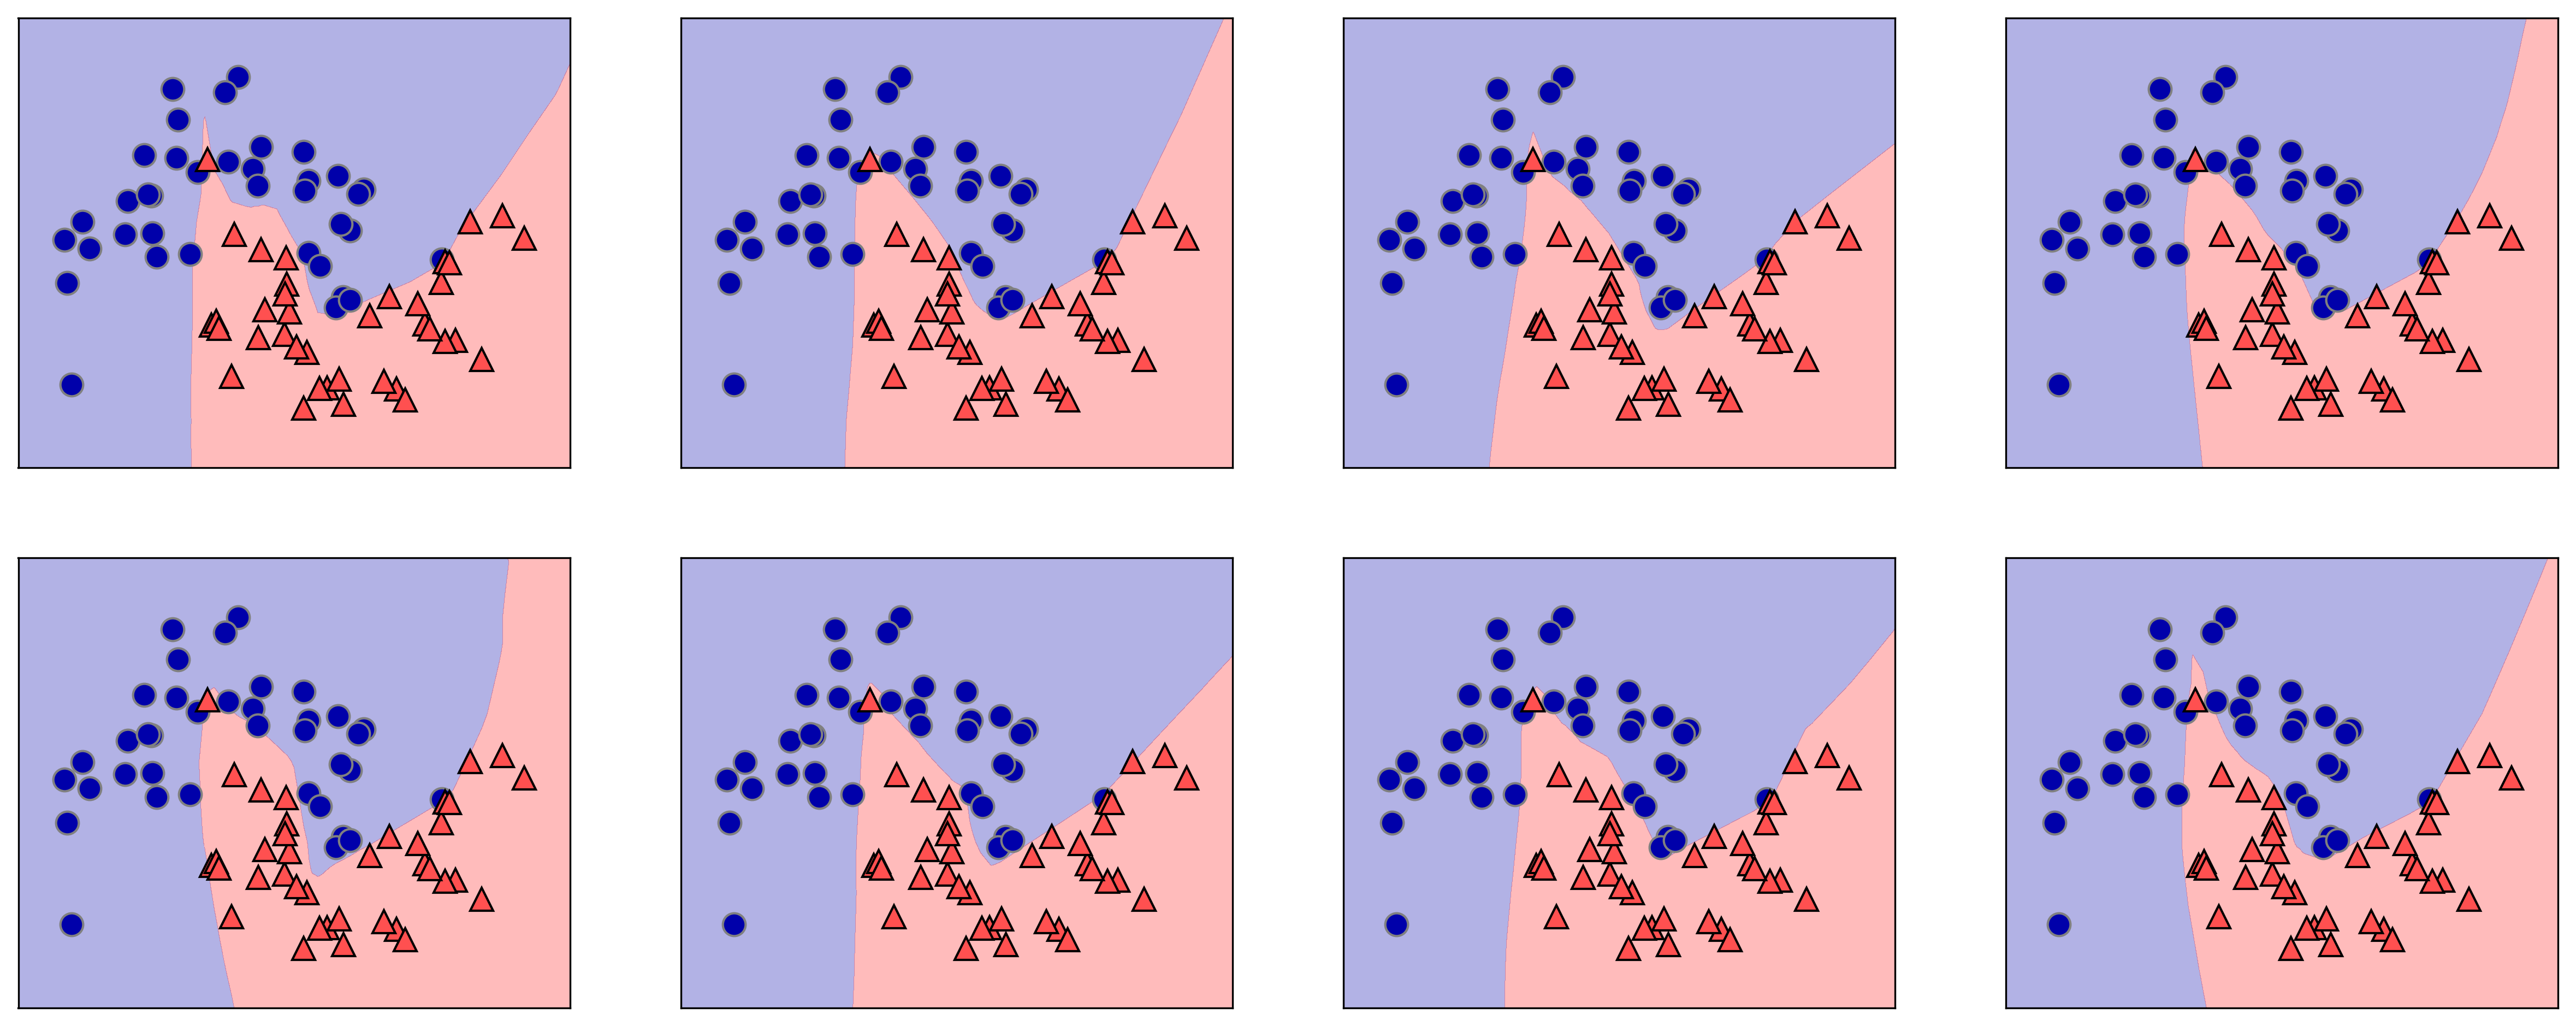

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


In [14]:
# 훈련 세트 각 특성의 평균을 계산
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면 => 평균 0, 표준 편차가 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 함
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


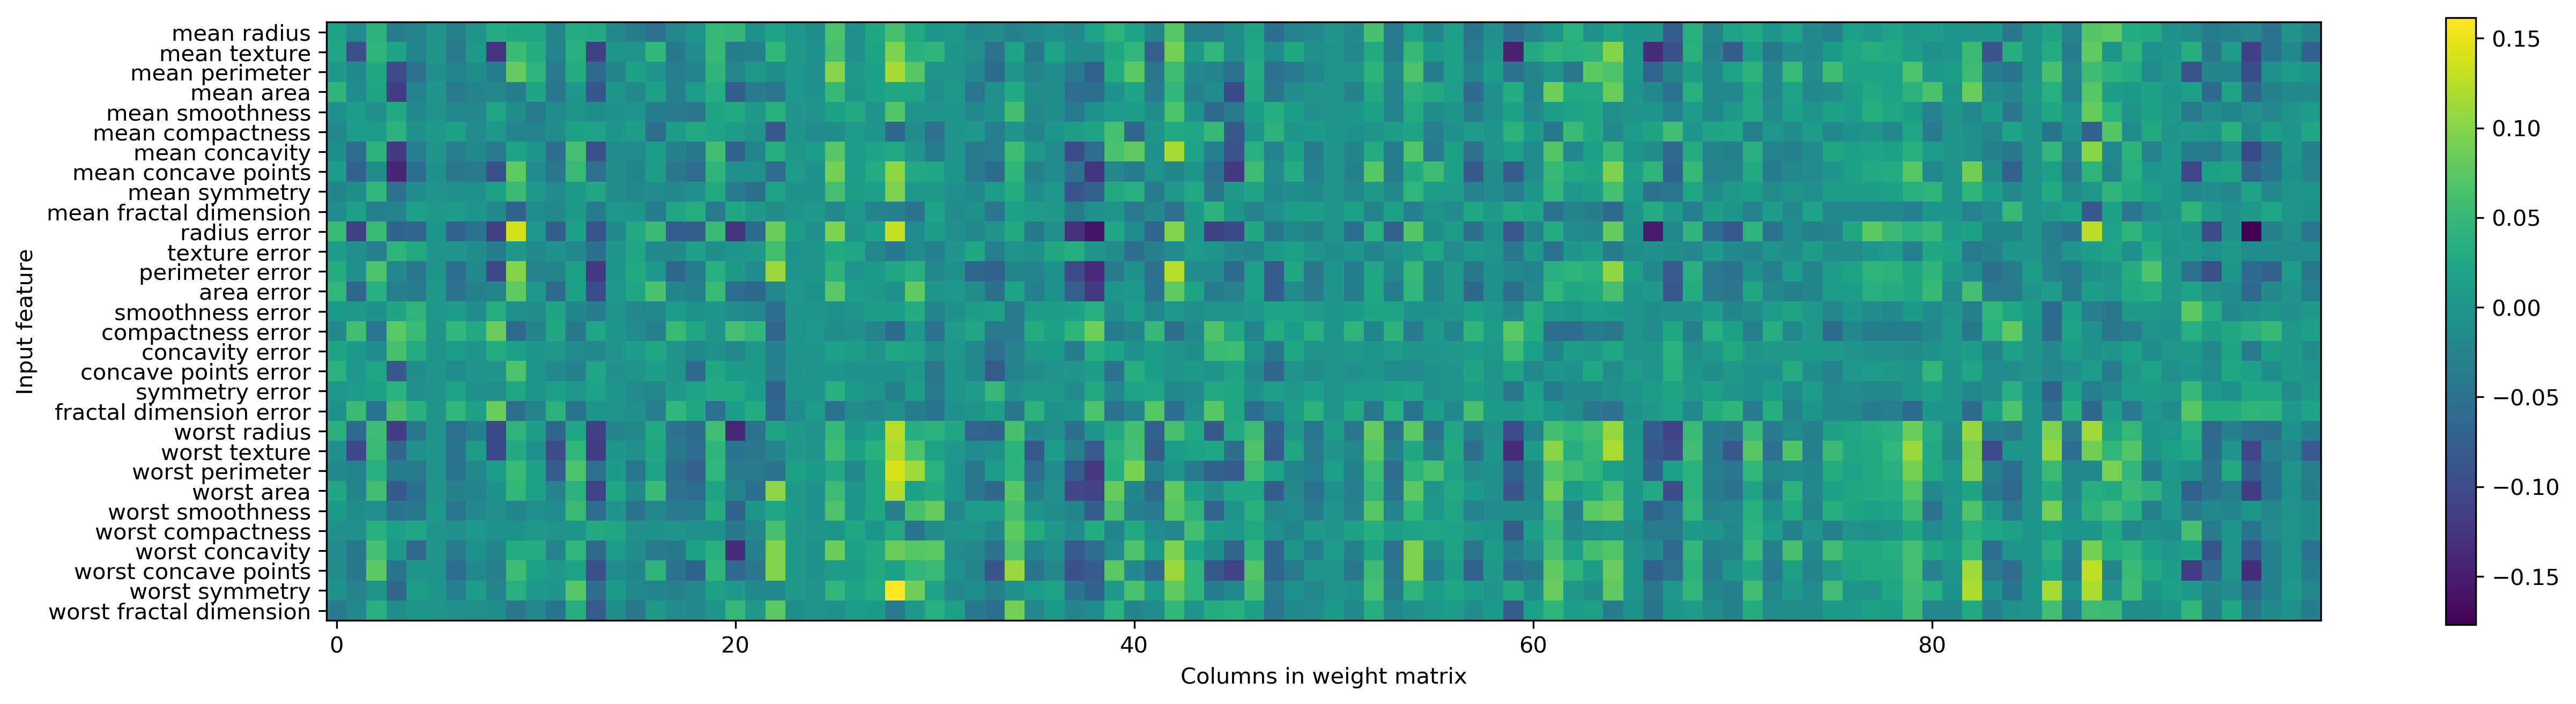

In [17]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

### 장단점과 매개변수
- 머신러닝 분야의 많은 애플리케이션에서 최고의 모델로 다시 떠오름
- 장단점
    - 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있음
    - 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 신경만은 종종 다른 머신러닝 알고리즘을 뛰어넘는 성능을 냄
    - 학습이 오래걸림
    - 데이터 전처리에 주의
    - 모든 특성이 같은 의미를 가진 동질의 데이터에 대해 잘 작동
        - 다른 종류의 특성을 가진 데이터라면 트리 기반의 모델이 더 잘 작동할 수 있음
- 매개변수
    - 은닉층의 개수
    - 은닉층의 유닛 수 -> 보통 입력 특성의 수와 비슷하게 설정 (수천 초중반을 넘기는 일은 거의 없음)
    - 학습된 가중치 또는 계수의 수
        - 특성 100개와 은닉 유닛이 100개를 가진 이진 분류일 때, 입력층과 첫번째 은닉층 사이에는 100 * 100 = 10,000개의 가중치가 있음
        - 또한 은닉층과 출력층 사에는 100 * 1개의 가중치가 있어 총 10,100개의 가중치가 있게 됨
        - 은닉층이 2개라면 20,100개가 됨 (첫번째 은닉층 -> 두번째 은닉층 => 100 * 100 = 10,000)
        - 만약 유닛이 1,000개인 은닉층 하나만 사용한다면 입력층과 은닉층 사이에 100 * 1,000 = 100,000개의 가중치를 학습해야 함
        - 결과적으로 101,000개의 가중치가 필요
        - 만약 여기서 두번째 은닉층이 있다면 => 1,000 * 1,000 = 1,000,000개가 추가되어 1,101,000개가 필요
        - 결과적으로 유닛이 100개짜리 은닉층 두 개였을 때보다 50개가 커짐
    - solver: adam과 lbfgs, sgd 옵션이 있음
        - adam: 기본값, 데이터 스케일에 조금 민감 (데이터를 평균 0, 분산을 1로 조정하는 것이 중요)
        - lbfgs: 규모가 큰 모델이나 대량의 데이터셋에서는 시간이 오래 걸림
        - sgd: 다른 여러 매개변수와 함께 튜닝하여 최선의 결과를 만등 수 있음
        - MLP를 처음 사용할 때에는 adam과 lbfgs가 좋음
- 매개변수를 조절하는 일반적인 방법
    - 충분히 과대적합되어서 문제를 해결할만한 큰 모델을 만듦
    - 훈련 데이터가 충분히 학습될 수 있다고 생각될 때 신경만 구조를 줄이거나 규제 강화를 위해 alpha 값을 증가시켜 일반화 성능을 향상시킴
    